<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/StockPrediction_QuandlAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=a191ad17b672a4dc0fda8d3f48814cb5a4e5ac523bc1dc18f5334fab65ce4845
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import statsmodels.tsa.stattools as sts
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

In [4]:
# importing data
co1 = 'CNQ'
co2 = 'PXD'
tickers = co1 + " " + co2
raw_data = yfinance.download (tickers = tickers, interval = '1d', group_by = 'ticker',auto_adjust = True, treads = True)

[*********************100%***********************]  2 of 2 completed


In [18]:
raw_data[co1][0:4].Close

Date
1997-08-08   NaN
1997-08-11   NaN
1997-08-12   NaN
1997-08-13   NaN
Name: Close, dtype: float64

[]

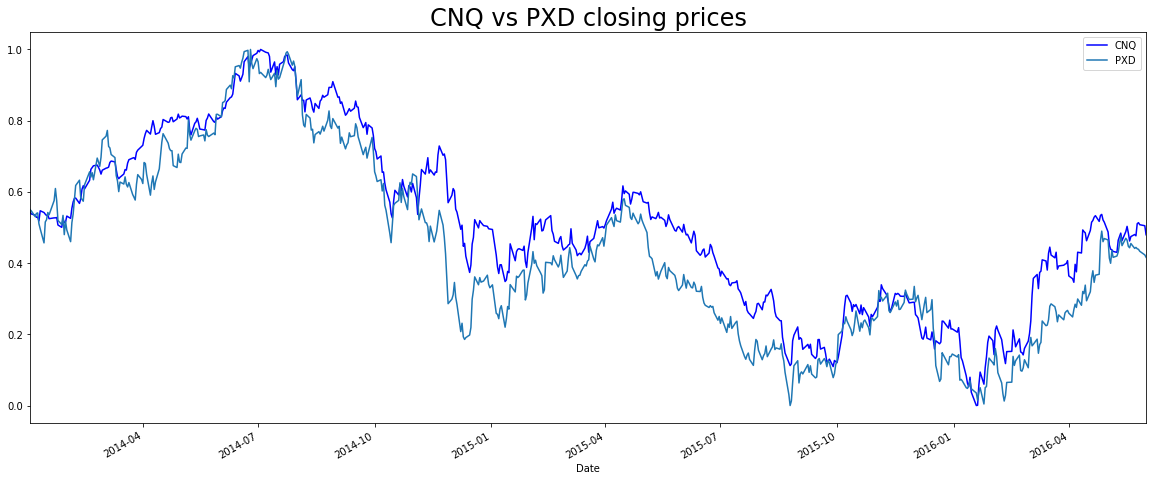

In [19]:
# defining interval for analysis
start = '2014-01-01'
end = '2016-06-01'
cnq = pd.DataFrame(raw_data[co1][start:end].Close)
pxd = pd.DataFrame(raw_data[co2][start:end].Close)
# filling data gaps
cnq = cnq.fillna(method = 'bfill')
pxd = pxd.fillna(method = 'bfill')
# renaming columns
cnq = cnq.rename(columns = {'Close': 'CNQ'})
pxd = pxd.rename(columns = {'Close': 'PXD'})
# normalizing data
cnq = cnq.apply(lambda x: (x-x.min())/(x.max()-x.min()))
pxd = pxd.apply(lambda x: (x-x.min())/(x.max()-x.min()))
# charting prices
chart = pd.concat([cnq, pxd], axis = 1)
chart['CNQ'].plot(figsize = (20,8), color = 'blue')
chart['PXD'].plot()
plt.title('CNQ vs PXD closing prices', size = 24)
plt.legend()
plt.plot()

In [20]:
# co-integration test
sts.coint(cnq, pxd)

(-4.495765077156233,
 0.0012444420134370767,
 array([-3.91457366, -3.34621458, -3.05144453]))

In [24]:
prices = raw_data.history([cnq, pxd], 'price', 30, '1d')

AttributeError: ignored

In [0]:
### Linear ALgbra-

E0: 2x0 +x1 +5x2 = 8
E1: 4x0+4x1-4x2 = 4
E3: x0 +3x1 +x3 = 5


In [0]:
# AX = b format in matricess
A = np.array([[2, 1, 5],
            [4, 4, -4],
            [1, 3, 1]])
b= np.array([8,4,5])

In [43]:
n = A.shape[0]
C=np.c_[A,b.reshape(-1,1)]
C

array([[ 2,  1,  5,  8],
       [ 4,  4, -4,  4],
       [ 1,  3,  1,  5]])

In [0]:
def gaussian_partial(A, b):
    
    n = A.shape[0]
    
    C=np.c_[A,b.reshape(-1,1)]
    
    flag = 0
    
    #column
    for i in range(n-1):
            
        max_c, chosen_k  = 0, i
        
        #find the pivot
        for k in range(i, n):
            if np.abs(C[k,i]) > max_c:
                max_c = np.abs(C[k,i])
                chosen_k = k
         
        #Check if the pivot is zero
        if max_c == 0:
            flag = 1
            break
        
        #interchange rows
        if chosen_k != i:
            #Swap 2 rows
            temp = C[i,:].copy()
            C[i,:] = C[chosen_k,:]
            C[chosen_k,:] = temp
    
        
        #row
        for j in range(i+1, n):
            
            c = C[j,i]/C[i,i]
            C[j,:] = C[j,:] - c*C[i,:]
            
    return C, flag

In [0]:
def backsubstitution(T):
    
    flag=0
    n = T.shape[0]
    X = np.zeros((n))
    if T[n-1,n-1] == 0:
        flag = 1
    
    else:
    
        X[n-1] = T[n-1,n]/T[n-1,n-1] 

        for i in range(n-2,-1,-1):
            #Sum in row i
            s = 0
            for j in range(i+1, n):
                s += T[i,j]*X[j]

            X[i] = (T[i,n] - s)/T[i,i]
    
    return X, flag

In [49]:
T, err = gaussian_partial(A,b)

if err:
    print('Not unique solution')
else:
    X, err = backsubstitution(T)
    if err:
        print('Not unique solution')
    else:
        print('Solution:', X)

Solution: [1. 1. 1.]


In [50]:
np.linalg.solve(A,b)

array([[1.],
       [1.],
       [1.]])

In [2]:

!pip install yelpapi
from yelpapi import YelpAPI

In [0]:
def getDetailsFromAdress(adress):
    #adress = adress + " stockholm"
    yelp_api = YelpAPI(
        "MrRGPpo52MhH9Rhd2mYhqVTHUTolmcqQ1ekyXhAdh15ckOCdKeEPqgMvvOCBQM149OD5CpXMlg32NRseNdbtARSn_wErkvnAaLUXwZ0EBm4uhJXucT1ULSSrX9vwXXYx")
    response = yelp_api.search_query(location=adress, radius=2000, limit=1)
    print(response)
    latitude = response['region']['center']['latitude']
    longitude = response['region']['center']['longitude']
    pointsOfInterestsNearby = response['total']
    return (latitude, longitude, pointsOfInterestsNearby)







In [16]:
data = getDetailsFromAdress('1359 bonnie cove glendora ca 91740')
# dat2 = updateDfWithYelpDetails(data,1,1)
data

{'businesses': [{'id': 'PxXFf3ZSK6gm3r-PZOFYqg', 'alias': 'taco-grill-glendora', 'name': 'Taco Grill', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/kQd1cxfY2QbMbxXmBsalmg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taco-grill-glendora?adjust_creative=xMgfPV_A6y7t9Y9B2Yo84w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=xMgfPV_A6y7t9Y9B2Yo84w', 'review_count': 579, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.5, 'coordinates': {'latitude': 34.121622, 'longitude': -117.872037}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '537 W Baseline Rd', 'address2': None, 'address3': '', 'city': 'Glendora', 'zip_code': '91740', 'country': 'US', 'state': 'CA', 'display_address': ['537 W Baseline Rd', 'Glendora, CA 91740']}, 'phone': '+16269144949', 'display_phone': '(626) 914-4949', 'distance': 1653.3987537455973}], 'total': 144, 'region': {'center': {'longitude': -117.8558349609375, 'latitude'

(34.11520476766407, -117.8558349609375, 144)

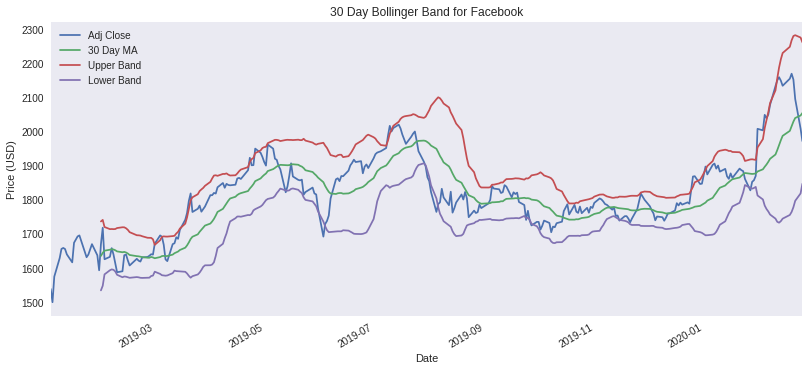

No handles with labels found to put in legend.


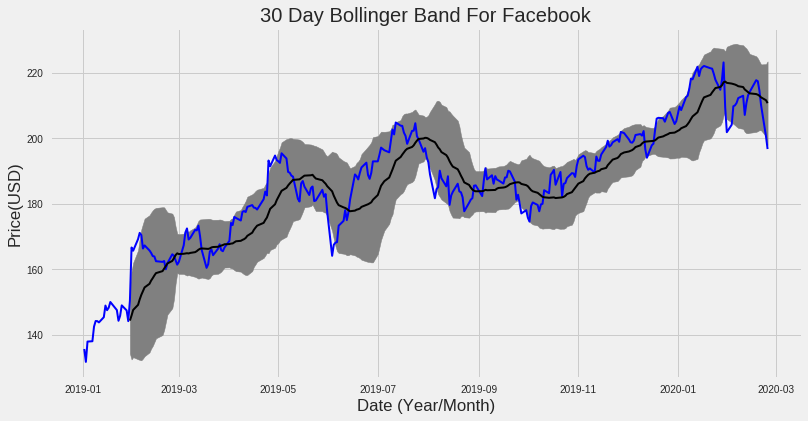

In [38]:
# import needed libraries

## Excellent Github tutorial : https://github.com/PyDataBlog/Python-for-Data-Science/tree/master/Tutorials
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

# Get Adjusted Closing Prices for Facebook, Tesla and Amazon between 2016-2017
fb = get_adj_close('fb', '1/2/2019', '02/25/2020')
tesla = get_adj_close('tsla', '1/2/2019', '02/25/2020')
amazon = get_adj_close('amzn', '1/2/2019', '02/25/2020')

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (fb, tesla, amazon):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std()
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
item[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Facebook')
plt.ylabel('Price (USD)')
plt.show()

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = fb.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, fb['Upper Band'], fb['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, fb['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, fb['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Facebook')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()

In [22]:
!pip install quandl

  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=0a953581bae2ac6e3351ab1627ab45673848785bb83fa93d1e2cbe303cc573a1
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


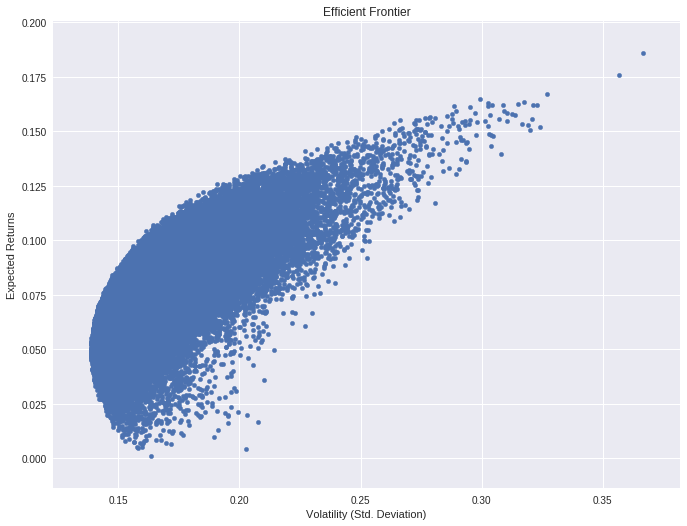

In [26]:
# # import needed modules
# import quandl
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # get adjusted closing prices of 5 selected companies with Quandl
# quandl.ApiConfig.api_key = 'VjNwisks-7VKb4oHznDd'
# selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
# data = quandl.get_table('WIKI/PRICES', ticker = selected,
#                         qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                         date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    

    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

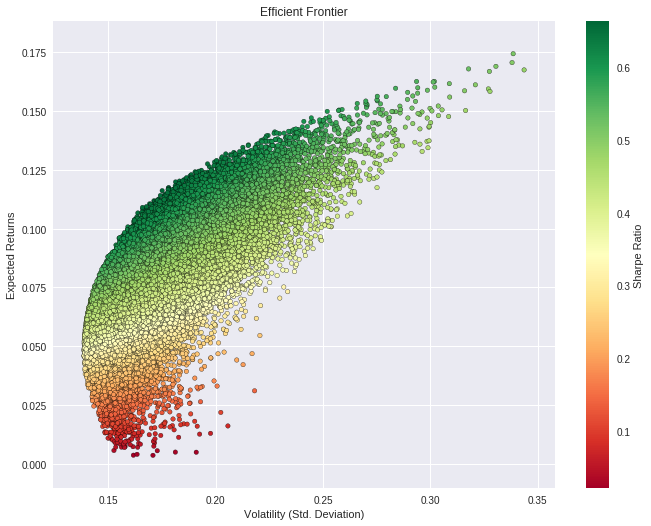

In [28]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'VjNwisks-7VKb4oHznDd'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [0]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [37]:
table = data[0]
table

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN
